## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-27 06:52:40--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-27 06:52:40--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-27 06:52:40 (7.48 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-27 06:52:40--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  
  X = np.load(path_X)
  y = np.load(path_y)

  # -------------------------------


  return X, y

In [ ]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  
  D = X.shape[1]
  out_shape=y.shape[1]

  # -------------------------------
  
  W = np.random.randn(D, out_shape)

  return W

In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  
  temp = np.sum((y-y_pred)**2)
  error = temp/len(y)

  # -------------------------------

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------

  A = np.matmul(X.T,X)
  A_inverse=np.linalg.inv(A)
  B= np.matmul(A_inverse,X.T)
  W=np.matmul(B,y)
  
  # -------------------------------

  return W

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------

  error_hist=np.zeros(epochs,)
  W = get_linear_model(X, y)
  for i in range(epochs):
      W = W - lr*np.matmul(X.T , np.matmul(X,W)-y)
      y_pred = np.matmul(X,W)
      error_hist[i] = MSE(y,y_pred)
      print(error_hist[i])
  
  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

5.490059820643823


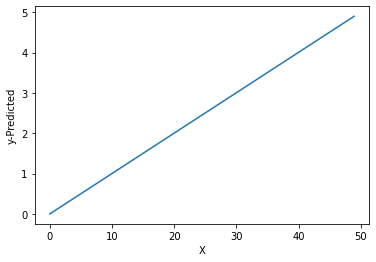

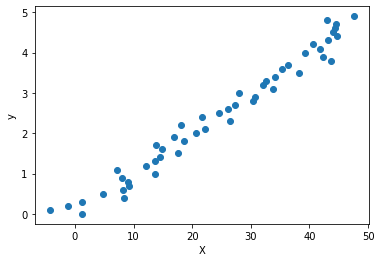

In [ ]:
    # Write your code here ----------

    X,y=load_data_LR()   
    W = train_by_algebra(X, y)
    y_pred = np.matmul(X,W)
    print(MSE(y,y_pred))
    plt.plot(y_pred,X)
    plt.ylabel('y-Predicted')
    plt.xlabel('X')
    plt.show()
    plt.scatter(y,X)
    plt.ylabel('y')
    plt.xlabel('X')
    plt.show()
     
    # -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

7279.680217341184
67341.25897364532
623319.6565898686
5769903.962508709
53410837.73169017
494413731.20208526
4576692071.746922
42365551728.74205
392169703981.9877
3630238966835.784


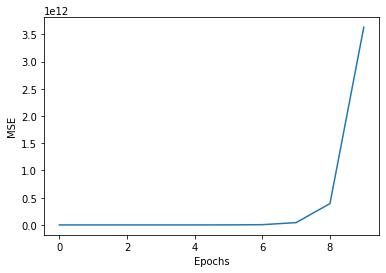

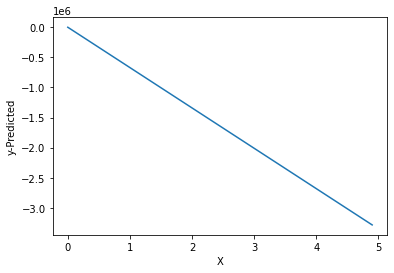

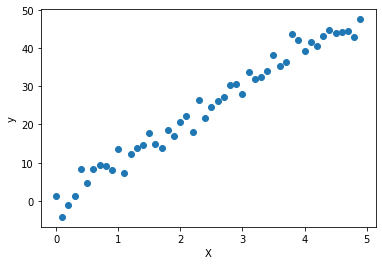

272.38236791777547
100.21496070663085
39.109638113602855
17.422255410447896
9.725011560748122
6.993120687022643
6.023523271158563
5.679395634915076
5.557258521006836
5.513909853179181


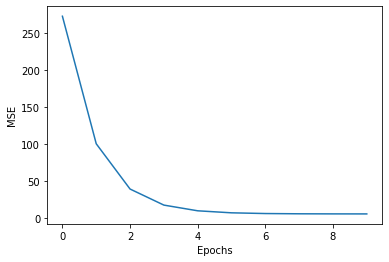

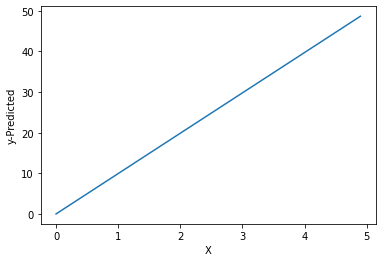

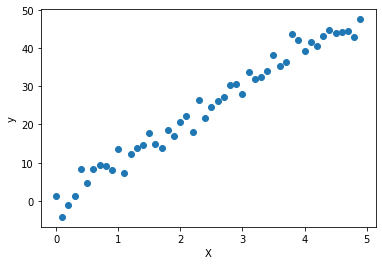

804.3279875449978
741.0473865524859
682.7796102181384
629.1275635292754
579.7256076800167
534.2370682420843
492.35194072789983
453.784777909378
418.2727444944943
385.573825904243


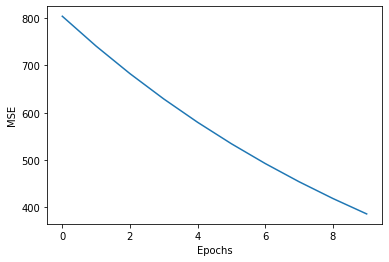

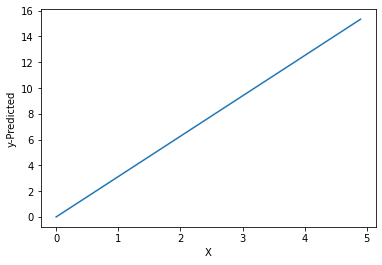

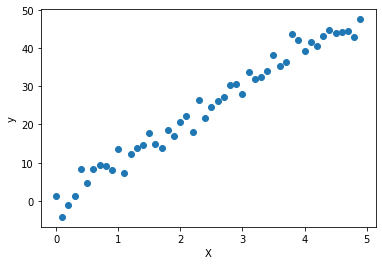

In [ ]:
# Write your code here ----------

X,y=load_data_LR()   
lr = [0.01, 0.001, 0.0001]
epochs = np.arange(10)
for i in lr:
  W , error = train_by_GD(X, y, 10 , i)
  plt.plot(epochs,error)
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.show()
  y_pred=np.matmul(X,W)
  plt.plot(X,y_pred)
  plt.ylabel('y-Predicted')
  plt.xlabel('X')
  plt.show()
  plt.scatter(X,y)
  plt.ylabel('y')
  plt.xlabel('X')
  plt.show()
    
  
# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [5]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  
  cifar10_data = tf.keras.datasets.cifar10
  (x_train,y_train),(x_test,y_test)= cifar10_data.load_data()
  x_train=x_train/255.0
  x_test=x_test/255.0

  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [10]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------

  model = keras.Sequential([
          keras.layers.Flatten(input_shape=input_shape),
          keras.layers.Dense(7200,activation=tf.nn.relu),
          keras.layers.Dense(2304,activation=tf.nn.relu),
          keras.layers.Dense(1024,activation=tf.nn.relu),
          keras.layers.Dense(64,activation=tf.nn.relu),
          keras.layers.Dense(num_class, activation=tf.nn.softmax)

  ])

  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [8]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------

  model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(num_class,activation='softmax')
        ])
  
  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 4s 37ms/step - loss: 2.6342 - accuracy: 0.1825 - val_loss: 2.0280 - val_accuracy: 0.2503
Epoch 2/10
98/98 [==============================] - 3s 34ms/step - loss: 1.9149 - accuracy: 0.2960 - val_loss: 1.8215 - val_accuracy: 0.3437
Epoch 3/10
98/98 [==============================] - 3s 35ms/step - loss: 1.7959 - accuracy: 0.3551 - val_loss: 1.7093 - val_accuracy: 0.3904
Epoch 4/10
98/98 [==============================] - 3s 35ms/step - loss: 1.6912 - accuracy: 0.3974 - val_loss: 1.6843 - val_accuracy: 0.4034
Epoch 5/10
98/98 [==============================] - 3s 35ms/step - loss: 1.6334 - accuracy: 0.4166 - val_loss: 1.6201 - val_accuracy: 0.4210
Epoch 6/10
98/98 [==============================] - 4s 36ms/step - loss: 1.5740 - accuracy: 0.4393 - val_loss: 1.5845 - val_accuracy: 0.4443
Epoch 7/10
98/98 [==============================] - 3s 35ms/step - loss: 1.5374 - accuracy: 0.4507 - val_loss: 1.5247 - val_accuracy: 0.4613
Epoch 8/10
98

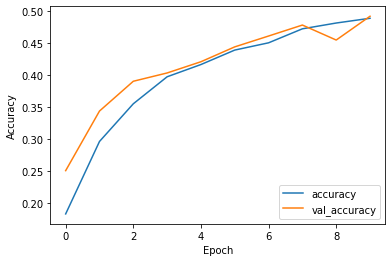

In [11]:
# Write your code here ----------

x_train,y_train,x_test,y_test = load_data_cifar10_norm()
model = build_fc_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 30s 21ms/step - loss: 1.9263 - accuracy: 0.2892 - val_loss: 1.7199 - val_accuracy: 0.3774
Epoch 2/10
98/98 [==============================] - 2s 16ms/step - loss: 1.5725 - accuracy: 0.4315 - val_loss: 1.4722 - val_accuracy: 0.4685
Epoch 3/10
98/98 [==============================] - 2s 16ms/step - loss: 1.4195 - accuracy: 0.4921 - val_loss: 1.3613 - val_accuracy: 0.5164
Epoch 4/10
98/98 [==============================] - 2s 16ms/step - loss: 1.3345 - accuracy: 0.5261 - val_loss: 1.3124 - val_accuracy: 0.5301
Epoch 5/10
98/98 [==============================] - 2s 16ms/step - loss: 1.2712 - accuracy: 0.5482 - val_loss: 1.2835 - val_accuracy: 0.5450
Epoch 6/10
98/98 [==============================] - 2s 16ms/step - loss: 1.2308 - accuracy: 0.5654 - val_loss: 1.2122 - val_accuracy: 0.5692
Epoch 7/10
98/98 [==============================] - 2s 16ms/step - loss: 1.1737 - accuracy: 0.5829 - val_loss: 1.1696 - val_accuracy: 0.5887
Epoch 8/10
9

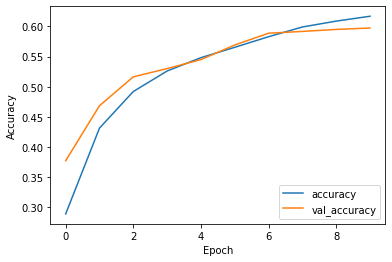

In [9]:
# Write your code here ----------

x_train,y_train,x_test,y_test = load_data_cifar10_norm()
model = build_cnn_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [12]:
print("The trainable parameters in cnn is less than fc model \nThe accuracy of cnn model is higher than fc model.\nIn Acurracy vs epoch graph of fc and cnn model the accuracy at each epoch is higher in cnn then fc.")

The trainable parameters in cnn is less than fc model 
The accuracy of cnn model is higher than fc model.
In Acurracy vs epoch graph of fc and cnn model the accuracy at each epoch is higher in cnn then fc.
